In [820]:
%reset -sf

In [821]:
!mkdir -p output

In [822]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict

import ortools
import networkx as nx
import graph_tool
import graph_tool.draw

# Input parsing

In [823]:
!ls input_data

a_an_example.in.txt         d_dense_schedule.in.txt
b_better_start_small.in.txt e_exceptional_skills.in.txt
c_collaboration.in.txt      f_find_great_mentors.in.txt


In [824]:
case_a = "a_an_example.in.txt"
case_b = "b_better_start_small.in.txt"
case_c = "c_collaboration.in.txt"
case_d = "d_dense_schedule.in.txt"
case_e = "e_exceptional_skills.in.txt"
case_f = "f_find_great_mentors.in.txt"

folder_in = "input_data/"
folder_out = "output/"

In [825]:
# !head input_data/e_exceptional_skills.in.txt

In [826]:
cases = [case_a, case_b, case_c, case_d, case_e, case_f]

In [827]:
case = case_a
# case = case_b
# case = case_c
# case = case_d
case = case_e
case = case_f

In [828]:
!cat input_data/a_an_example.in.txt

3 3
Anna 1
C++ 2
Bob 2
HTML 5
CSS 5
Maria 1
Python 3
Logging 5 10 5 1
C++ 3
WebServer 7 10 7 2
HTML 3
C++ 2
WebChat 10 20 20 2
Python 3
HTML 3


In [829]:
def input_parser(filename):

    with open(filename) as f:
        srr = [row.strip() for row in f.readlines()]

    ptr = 0
    c,p = [int(x) for x in srr[ptr].split()]
    ptr += 1

    name_to_skills_and_levels = defaultdict(list)

    for _ in range(c):
        name, num_skills = srr[ptr].split()
        num_skills = int(num_skills)
        ptr += 1

        for _ in range(num_skills):
            skill, skill_level = srr[ptr].split()
            skill_level = int(skill_level)
            ptr += 1

            name_to_skills_and_levels[name].append((skill, skill_level))

    project_to_days_needed = {}
    project_to_score_given = {}
    project_to_best_before = {}
    project_to_skills_and_skill_levels = defaultdict(list)
    
    # augmented info
    project_to_people_needed = {}
    project_to_people_days_needed = {}
    project_to_unique_skills_needed = {}

    for _ in range(p):
        project_name, d, s, b, r = srr[ptr].split()
        ptr += 1

        project_to_days_needed[project_name] = int(d)
        project_to_score_given[project_name] = int(s)
        project_to_best_before[project_name] = int(b)

        for _ in range(int(r)):
            skill, skill_level_required = srr[ptr].split()
            skill_level_required = int(skill_level_required)
            ptr += 1

            project_to_skills_and_skill_levels[project_name].append((skill, skill_level_required))
                        
        # aug
        project_to_people_needed[project_name] = \
            len(project_to_skills_and_skill_levels[project_name])
        
        project_to_people_days_needed[project_name] = \
            project_to_days_needed[project_name] * project_to_people_needed[project_name]
        
        project_to_unique_skills_needed[project_name] = len(
            set(x[0] for x in project_to_skills_and_skill_levels[project_name]))
    
    return (name_to_skills_and_levels,
            project_to_days_needed,
            project_to_score_given,
            project_to_best_before,
            project_to_skills_and_skill_levels,
            project_to_people_needed, 
            project_to_people_days_needed,  
            project_to_unique_skills_needed)

In [830]:
# g++ -std=c++17 checker.cpp -o checker && ./checker 

In [831]:
# i.e. they need to have 

In [832]:
name_to_skills_and_levels, \
project_to_days_needed, \
project_to_score_given, \
project_to_best_before, \
project_to_skills_and_skill_levels, \
project_to_people_needed, \
project_to_people_days_needed, \
project_to_unique_skills_needed = input_parser(folder_in + case)

In [833]:
print(case)

project_days = 0
for project in project_to_skills_and_skill_levels:
    people_needed = len(project_to_skills_and_skill_levels[project])
    days_needed = project_to_days_needed[project]
    project_days += people_needed*days_needed

project_days_needed = project_days
print("total project-days needed", project_days)

project_days = 0
for project in project_to_skills_and_skill_levels:
    people_needed = len(project_to_skills_and_skill_levels[project])
    days_needed = project_to_best_before[project]
    project_days += people_needed*days_needed

print("total project-days available", project_days)

print("ratio", project_days_needed/project_days)

f_find_great_mentors.in.txt
total project-days needed 358542004
total project-days available 12306416362
ratio 0.029134558221767404


In [834]:
print("number of contributors", len(name_to_skills_and_levels))
print("number of projects", len(project_to_days_needed))

number of contributors 1000
number of projects 19413


f_find_great_mentors.in.txt


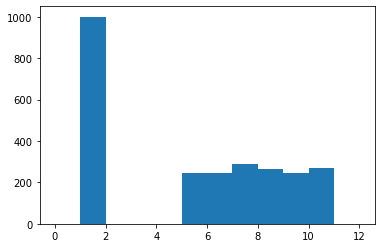

In [835]:
print(case)
skill_levels = []
for name, skills_and_levels in name_to_skills_and_levels.items():
    for skill, level in skills_and_levels:
        skill_levels.append(level)
plt.hist(skill_levels, bins=range(max(skill_levels) + 3))
plt.show()

f_find_great_mentors.in.txt


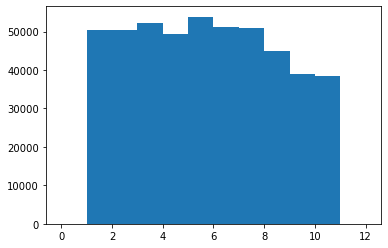

In [836]:
print(case)
skill_levels = []
for name, skills_and_levels in project_to_skills_and_skill_levels.items():
    for skill, level in skills_and_levels:
        skill_levels.append(level)
plt.hist(skill_levels, bins=range(max(skill_levels) + 3))
plt.show()

f_find_great_mentors.in.txt


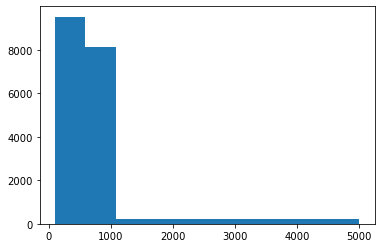

In [837]:
print(case)
plt.hist(project_to_days_needed.values())
plt.show()

f_find_great_mentors.in.txt


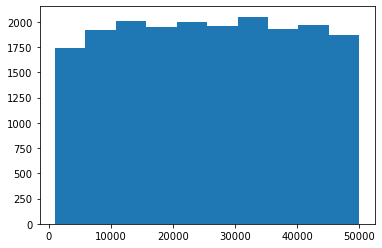

In [838]:
print(case)
plt.hist(project_to_best_before.values())
plt.show()

f_find_great_mentors.in.txt
9136275


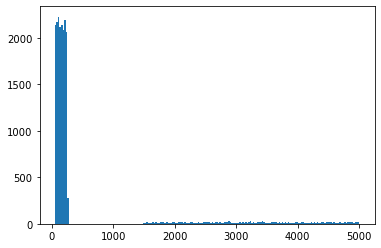

In [839]:
print(case)
print(sum(project_to_score_given.values()))
plt.hist(project_to_score_given.values(), bins=200)
plt.show()

f_find_great_mentors.in.txt


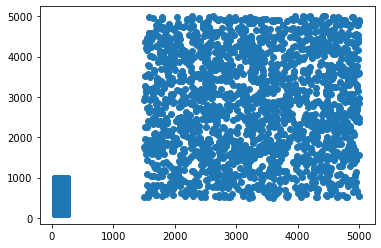

In [840]:
print(case)
# x - project_to_score_given 
# y - project_to_days_needed 
n = len(list(project_to_score_given.values()))
plt.scatter(np.array(list(project_to_score_given.values())) + np.random.randn(n)/10, 
            np.array(list(project_to_days_needed.values())) + np.random.randn(n)/10)
plt.show()

f_find_great_mentors.in.txt


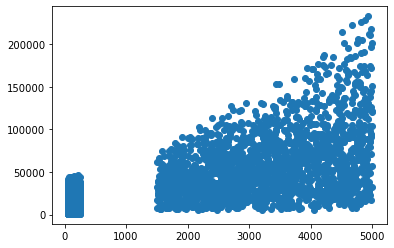

In [841]:
print(case)
# x - project_to_score_given 
# y - project_to_people_days_needed 
n = len(list(project_to_score_given.values()))
plt.scatter(np.array(list(project_to_score_given.values())) + np.random.randn(n)/10, 
            np.array(list(project_to_people_days_needed.values())) + np.random.randn(n)/10)
plt.show()

f_find_great_mentors.in.txt


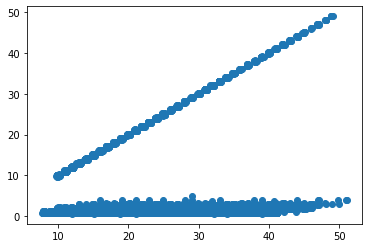

In [842]:
print(case)
# x - project_to_people_needed 
# y - project_to_unique_skills_needed 
n = len(list(project_to_score_given.values()))
plt.scatter(np.array(list(project_to_people_needed.values())) + np.random.randn(n)/10, 
            np.array(list(project_to_unique_skills_needed.values())) + np.random.randn(n)/10)
plt.show()

f_find_great_mentors.in.txt


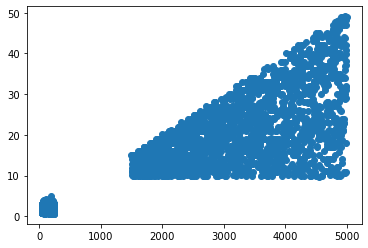

In [844]:
print(case)
# x - project_to_score_given 
# y - project_to_unique_skills_needed 
n = len(list(project_to_score_given.values()))
plt.scatter(np.array(list(project_to_score_given.values())) + np.random.randn(n)/10, 
            np.array(list(project_to_unique_skills_needed.values())) + np.random.randn(n)/10)
plt.show()

f_find_great_mentors.in.txt


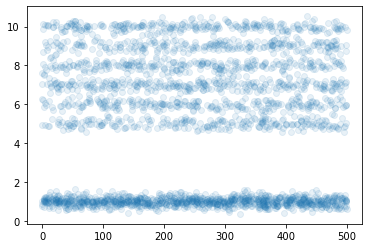

In [860]:
print(case)
all_skills = set()
for name, skills_and_levels in name_to_skills_and_levels.items():
    for skill, level in skills_and_levels:
        all_skills.add(skill)

skill_to_idx = {x:i for i,x in enumerate(all_skills)}
        
# x - skill_idx 
# y - skill level
    
xx, yy = [], []
for name, skills_and_levels in name_to_skills_and_levels.items():
    for skill, level in skills_and_levels:
        xx.append(skill_to_idx[skill])
        yy.append(level)

n = len(list(xx))
plt.scatter(np.array(xx) + np.random.randn(n)/5, 
            np.array(yy) + np.random.randn(n)/5, alpha=0.1)
plt.show()

In [850]:
# case

In [851]:
# name_to_skills_and_levels

In [843]:
# assert False

In [767]:
# # pretty messy when large

# for idx in reversed(sorted(G.get_vertices())):
#     if G.vertex(idx).out_degree() > 7:
#         G.remove_vertex(idx)

# for idx in reversed(sorted(G.get_vertices())):
#     if G.vertex(idx).out_degree() == 0:
#         G.remove_vertex(idx)

# # pos = graph_tool.draw.random_layout(G)
# graph_tool.draw.graph_draw(G)
# plt.show()

# Upper bound analysis

In [768]:
# see Codeforces comment
# probably not gonna do for this practice
# also unlikely to do such complicated analysis in qualifiers

# Scoring

In [769]:
!ls output

adhoc.ipynb                 d_difficult.0000001420
c_coarse.0000000005         e_exceptional_skills.in.txt
c_coarse.in.txt.0000000005  output.txt


In [ ]:
ourput_parser(folder_out + case)

In [775]:
output_filename = folder_out + "e_exceptional_skills.in.txt"
output_filename = folder_out + "output.txt"

def output_parser(output_filename):

    ordered_project_and_teammates = []
    ptr = 0
    with open(output_filename) as f:
        srr = f.read().strip().split("\n")

    num_projects = int(srr[ptr])
    ptr += 1
    assert len(srr) == num_projects*2 + 1

    for _ in range(num_projects):
        project = srr[ptr]
        ptr += 1

        teammates = srr[ptr].split()
        ptr += 1
        ordered_project_and_teammates.append((project, teammates))
    
    return ordered_project_and_teammates

In [795]:
!ls output

adhoc.ipynb                 d_difficult.0000001420
c_coarse.0000000005         e_exceptional_skills.in.txt
c_coarse.in.txt.0000000005  output.txt


In [776]:
case

'a_an_example.in.txt'

In [777]:
name_to_skills_and_levels

defaultdict(list,
            {'Anna': [('C++', 2)],
             'Bob': [('HTML', 5), ('CSS', 5)],
             'Maria': [('Python', 3)]})

In [886]:
name_to_skills_and_levels, \
project_to_days_needed, \
project_to_score_given, \
project_to_best_before, \
project_to_skills_and_skill_levels, \
project_to_people_needed, \
project_to_people_days_needed, \
project_to_unique_skills_needed = input_parser(folder_in + case)

# output_filename = folder_out + "output.txt"
# output_filename = folder_out + "e_exceptional_skills.in.txt"

# ordered_project_and_teammates = output_parser(output_filename)

person_to_available_date = {name:0 for name in name_to_skills_and_levels}

person_and_skill_to_level = defaultdict(int)
for person, skills_and_levels in person_and_skill_to_level.items():
    for skill, level in skills_and_levels:
        person_and_skill_to_level[person, skill] = level

# for project, teammates in ordered_project_and_teammates:
#     # check individual allocation is ok
    
#     for person, (skill, skill_level) in zip(teammates, project_to_skills_and_skill_levels[project]):
#         assert person_and_skill_to_level[person, skill] + 1 >= skill_level        

# def scoring(crr):
#     crr = set(crr)
#     res = 0
#     for a,b in zip(arr,brr):
        
#         all_included = set(a) & crr == set(a)
#         all_excluded = set(b) & crr == set()

#         if all_included and all_excluded:
#             res += 1
#     return res

# scoring(list(always_include))

In [ ]:
# output_filename = folder_out + "output.txt"
# output_filename = folder_out + "e_exceptional_skills.in.txt"

# ordered_project_and_teammates = output_parser(output_filename)

In [868]:
name_to_skills_and_levels, \
project_to_days_needed, \
project_to_score_given, \
project_to_best_before, \
project_to_skills_and_skill_levels, \
project_to_people_needed, \
project_to_people_days_needed, \
project_to_unique_skills_needed = input_parser(folder_in + case)

person_to_available_date = {name:0 for name in name_to_skills_and_levels}

skill_and_level_to_person = defaultdict(set)
person_and_skill_to_level = defaultdict(int)
for person, skills_and_levels in name_to_skills_and_levels.items():
    for skill, level in skills_and_levels:
        person_and_skill_to_level[person, skill] = level
        skill_and_level_to_person[skill, level].add(person)

In [889]:
completed_projects = set()

In [891]:
while True:
    # training schedule
    for project in project_to_days_needed:
        if project_to_days_needed[project] > 1000:
            continue
        
        if project_to_unique_skills_needed[project] > 1:
            continue
        
        for level, skill in 
        
        break
    break

In [893]:
project_to_skills_and_skill_levels[project]

[('s52', 9),
 ('s52', 9),
 ('s52', 9),
 ('s52', 9),
 ('s52', 9),
 ('s52', 9),
 ('s52', 9),
 ('s52', 9),
 ('s52', 9)]

In [888]:
# [skills_and_skill_levels for project, skills_and_skill_levels in project_to_skills_and_skill_levels.items() 
#  if project_to_days_needed[project] > 1000]

In [872]:
# for i in range(skill_and_level_to_person):
#     pass

In [870]:
# skill_and_level_to_person

In [866]:
# person_and_skill_to_level

In [792]:
skill_level

[('C++', 3)]

In [791]:
person_and_skill_to_level

defaultdict(int, {('Bob', 'Logging'): 0})

In [789]:
person_and_skill_to_level["Bob"]

0

In [780]:
person_and_skill_to_level

defaultdict(int, {('Bob', 'Logging'): 0})

# Submission

In [63]:
import shutil

def save_file(res):
    shutil.copy("adhoc.ipynb", folder_out)
    score = str(scoring(res)).zfill(10)
    with open(folder_out + case + "." + score, "w") as f:
        f.write(str(len(res)) + " " + " ".join(res))
        
save_file(res)

# 1-opt

Idea - force to serve a customer

In [64]:
!ls output

adhoc.ipynb                  d_difficult.0000001420
c_coarse.in.txt.0000000001   d_difficult.in.txt0000001420
c_coarse.in.txt0000000001


In [65]:
# initialisation
crr = always_include

In [66]:
# loads an input

score = '0000000001'
filename = case + score
with open(folder_out + case + "." + score) as f:
    crr = f.read().split()[1:]

In [67]:
prev_points, pts = scoring(crr), 0
crr = set(crr)

while True:
    idx = np.random.randint(0,len(xrr)-1)
    
    if xrr[idx] & crr == xrr[idx] and not yrr[idx] & crr:
        continue
    new_crr = (crr | xrr[idx]) - yrr[idx]
    
    pts = scoring(new_crr)
    if pts > prev_points:
        crr = new_crr
        prev_points = pts
        print(pts)

3
4
5


KeyboardInterrupt: 

In [68]:
res = crr
save_file(res)

# 2-opt
Force to serve two customers

In [69]:
crr = set(crr)
prev_points, pts = scoring(crr), 0
# del idx

while True:
    idx1 = np.random.randint(0,len(xrr)-1)
    idx2 = np.random.randint(0,len(xrr)-1)
    
    if xrr[idx1] & yrr[idx2]:
        continue
    if xrr[idx2] & yrr[idx1]:
        continue
    if xrr[idx1] & crr == xrr[idx1] and not yrr[idx1] & crr:
        continue
    if xrr[idx2] & crr == xrr[idx2] and not yrr[idx2] & crr:
        continue
    
    new_crr = (crr | xrr[idx1] | xrr[idx2]) - yrr[idx1] - yrr[idx2]
    
    pts = scoring(new_crr)
    if pts > prev_points:
        crr = new_crr
        prev_points = pts
        print(pts)

KeyboardInterrupt: 

In [70]:
res = crr
save_file(res)

# Integer Programming
Likely totally useless in actual contest.

In [71]:
from ortools.linear_solver import pywraplp
solver = pywraplp.Solver.CreateSolver('SCIP')


In [72]:
ingredients = {x:solver.IntVar(0, 1, x) for x in to_decide}

targets = []
for i,(xr,yr) in enumerate(zip(xrr, yrr)):
    satisfied = solver.IntVar(0, 1, str(i).zfill(6))
    
    # all included ingredients
    if xr:
        solver.Add(len(xr) - sum(ingredients[x] for x in xr) <= (1 - satisfied) * (len(xr)))
    
    # all excluded ingredients 
    if yr:
        solver.Add(sum(ingredients[y] for y in yr) <= (1 - satisfied) * (len(yr)))
    targets.append(satisfied)

solver.SetTimeLimit(60*1000)
solver.Maximize(sum(targets))

In [73]:
status = solver.Solve()

In [74]:
if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())
else:
    print('The problem does not have an optimal solution.')

print('\nAdvanced usage:')
print('Problem solved in %f milliseconds' % solver.wall_time())
print('Problem solved in %d iterations' % solver.iterations())
print('Problem solved in %d branch-and-bound nodes' % solver.nodes())

Solution:
Objective value = 5.0

Advanced usage:
Problem solved in 1149.000000 milliseconds
Problem solved in 8 iterations
Problem solved in 1 branch-and-bound nodes


In [75]:
res = [k for k,v in ingredients.items() if v.solution_value() == 1]
res = set(res) | always_include

print(scoring(res))
save_file(res)

5
